In [297]:
import pandas as pd
import numpy as np

In [298]:
#1.讀檔“wine.data”,並放在一個data frame裡面.
df = pd.read_csv("wine.data.orig",
                 names=["class", 
                        "Alcohol", 
                        "Malicacid",
                        "Ash", 
                        "Alcalinity_of_ash",
                        "Magnesium",
                        "Total_phenols", 
                        "Flavanoids", 
                        "Nonflavanoid_phenols", 
                        "Proanthocyanins", 
                        "Color_intensity",
                        "Hue",
                        "0D280_0D315_of_diluted_wines",
                        "Proline"])

#2.列印前20筆資料
df.head(20)

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [299]:
#3.列印此data frame 的size
df.shape

(178, 14)

In [300]:
#4.將資料隨機分割成訓練集train_set和測試集test_set, 各佔80%和20%
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=1)

#5.對兩集合分別取第0行當class label, 第1~13行當資料特徵
X_train = train_set.iloc[:, 1:14]
Y_train = train_set["class"]
X_test = test_set.iloc[:, 1:14]
Y_test = test_set["class"]  

In [301]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


classifiers = [
    KNeighborsClassifier(1),
    DecisionTreeClassifier(max_depth=2),
    LogisticRegression(C=10**10),
    LinearDiscriminantAnalysis(),
    RandomForestClassifier(),
    MLPClassifier(),
    GaussianNB(),
    svm.SVC(),
    svm.SVC(kernel='poly', C=0.1, degree=2)
]

results_df = pd.DataFrame(columns=["Classifier", "Training Accuracy", "Testing Accuracy"])

#6.分別用以下方法訓練分類器並列印出訓練集的辨識率和測試集的辨識率
for clf in classifiers:
    # 訓練分類器
    clf.fit(X_train, Y_train)
    
    #訓練集和測試集的辨識率
    train_accuracy = clf.score(X_train, Y_train)
    test_accuracy = clf.score(X_test, Y_test)
    
    print(f"\n分類器：{clf}")
    print(f"訓練集辨識率：{train_accuracy:.4f}")
    print(f"測試集辨識率：{test_accuracy:.4f}")
    
    results_df = results_df.append({
        "Classifier": str(clf),
        "Training Accuracy": train_accuracy,
        "Testing Accuracy": test_accuracy
    }, ignore_index=True)


分類器：KNeighborsClassifier(n_neighbors=1)
訓練集辨識率：1.0000
測試集辨識率：0.7500

分類器：DecisionTreeClassifier(max_depth=2)
訓練集辨識率：0.9296
測試集辨識率：0.8611

分類器：LogisticRegression(C=10000000000)
訓練集辨識率：0.9648
測試集辨識率：0.9444

分類器：LinearDiscriminantAnalysis()
訓練集辨識率：1.0000
測試集辨識率：1.0000

分類器：RandomForestClassifier()
訓練集辨識率：1.0000
測試集辨識率：0.9722

分類器：MLPClassifier()
訓練集辨識率：0.9296
測試集辨識率：0.8889

分類器：GaussianNB()
訓練集辨識率：0.9859
測試集辨識率：1.0000

分類器：SVC()
訓練集辨識率：0.7254
測試集辨識率：0.6389

分類器：SVC(C=0.1, degree=2, kernel='poly')
訓練集辨識率：0.6620
測試集辨識率：0.6389


C:\Users\jason\AppData\Local\Temp\ipykernel_20660\3016387783.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\jason\AppData\Local\Temp\ipykernel_20660\3016387783.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jason

In [303]:
results_df

,Classifier,Training Accuracy,Testing Accuracy
0,KNeighborsClassifier(n_neighbors=1),1.000000,0.750000
1,DecisionTreeClassifier(max_depth=2),0.929577,0.861111
2,LogisticRegression(C=10000000000),0.964789,0.944444
3,LinearDiscriminantAnalysis(),1.000000,1.000000
4,RandomForestClassifier(),1.000000,0.972222
5,MLPClassifier(),0.929577,0.888889
6,GaussianNB(),0.985915,1.000000
7,SVC(),0.725352,0.638889
8,"SVC(C=0.1, degree=2, kernel='poly')",0.661972,0.638889


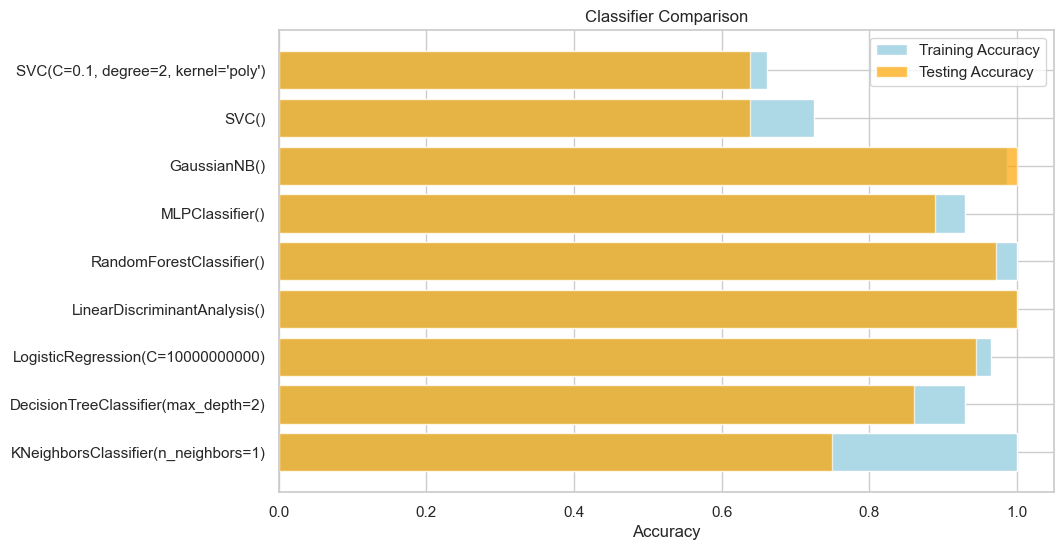

In [302]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) #創建圖表 寬度10單位、高度6單位。
plt.title("Classifier Comparison")
plt.barh(results_df["Classifier"], results_df["Training Accuracy"], color="lightblue", label="Training Accuracy")
plt.barh(results_df["Classifier"], results_df["Testing Accuracy"], color="orange", label="Testing Accuracy", alpha=0.7) #alpha=0.7 設置條形的透明度
plt.xlabel("Accuracy")
plt.legend(loc="upper right")
plt.show()